# Supervised learning

Supervised learning is about finting a function **f** for which a set of data points **X** will map to  a response **Y**. These functions are usually found implementing *models* which vary widely in complexity.

In order to demonstrate a simple application of machine learning, here we will implement a simple model called K-NN (k-nearest neighbors). This model finds a clas (or valur, in case of regression) looking at the k observations nearest to a new observation.

The way we will find the best value of K is through cross-validation. Which consists of leaving out part of our data (as if we didn't have it), finding the best model for the training data, and then reintroducing our test data, trying to predict its target variable with our **trained** model and evaluating which K has the least error.

In order to do this, we will generate some data with 3 classes.

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

n = 999

x_c1 = np.random.normal(20, 2.5, int(n/3))
y_c1 = np.random.normal(40, 2.5, int(n/3))
c1 = np.repeat("1", int(n/3))

x_c2 = np.random.normal(30, 2.5, int(n/3))
y_c2 = np.random.normal(45, 2.5, int(n/3))
c2 = np.repeat("2", int(n/3))

x_c3 = np.random.normal(30, 2.5, int(n/3))
y_c3 = np.random.normal(35, 2.5, int(n/3))
c3 = np.repeat("3", int(n/3))

data = pd.DataFrame({
    "x": np.concatenate((x_c1, x_c2, x_c3)),
    "y": np.concatenate((y_c1, y_c2, y_c3)),
    "c": np.concatenate((c1, c2, c3))
})

data.c = data.c.astype("category")

print(data.dtypes)
data.head()

x     float64
y     float64
c    category
dtype: object


,x,y,c
0,22.554736,37.728071,1
1,23.472496,38.521016,1
2,19.941920,39.955051,1
3,22.516737,39.145648,1
4,23.342464,38.181863,1


Here we can visualize the data in a **feature plot**, the color represents the class and the two axis are the predictors (features).

Visualizamos los datos:


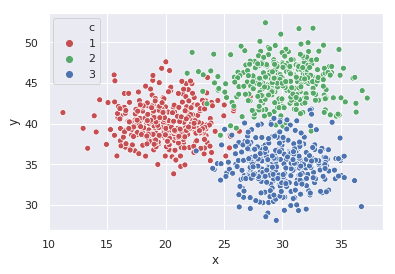

In [0]:
_ = sns.scatterplot(x = "x", y = "y", data = data, hue = "c", palette=["r", "g", "b"])

In order to perform cross validation, we will take 20% of the data and put it in out test set.

In [0]:
data_train_pred, data_test_pred, data_train_c, data_test_c = train_test_split(data.drop("c", axis = 1), data.loc[:,["c"]], test_size = 0.2)

Lets visualize the results of the splitting.

In [0]:
print(f"Train X: {(len(data_train_pred))}")
print(f"Train Y: {(len(data_train_c))}")
print(f"Test X: {(len(data_test_pred))}")
print(f"Test Y: {(len(data_test_c))}")

data_train_pred.head()

Train X: 799
Train Y: 799
Test X: 200
Test Y: 200


,x,y
570,31.607820,45.541692
315,21.660129,34.925592
376,27.548928,41.566227
450,27.602029,41.198466
745,34.581686,35.709778


We test all the values of K possible and visualize the error!

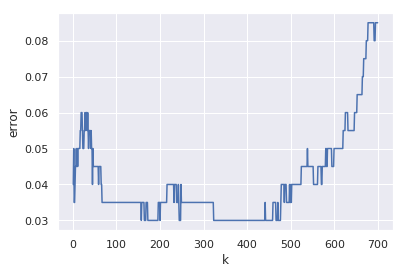

In [0]:
ks = list(range(1, 700))
k_error = []

for k in ks:
  model = KNeighborsClassifier(n_neighbors=k).fit(data_train_pred, data_train_c.values.ravel())
  score = model.score(data_test_pred, data_test_c.values.ravel())

  k_error.append(1 - score)
LIGERAMENTE
error_data = pd.DataFrame({
    "k": ks,
    "error": k_error
})

_ = sns.lineplot(x = "k", y = "error", data = error_data)

In the end, we choose the largest value of K (a more general model) that gives the lowest error!